In [1]:
import pandas as pd
import glob

# Read data

In [2]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-25.csv',
 'Date2023-03-06.csv',
 'Date2023-02-24.csv',
 'Date2023-03-05.csv',
 'Date2023-02-28.csv',
 'Date2023-03-04.csv',
 'Date2023-02-27.csv',
 'Date2023-02-26.csv',
 'Date2023-03-02.csv',
 'Date2023-03-01.csv',
 'Date2023-03-03.csv']

In [3]:
df_list = (pd.read_csv(file) for file in csv_files)

In [4]:
big_df = pd.concat(df_list, ignore_index=True)

In [5]:
big_df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,"214,218,172","+40,328","1,536,158",163.0,"198,825,034","+48,813","13,856,980","15,525",...,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
1,NaN,\nNorth America\n,"124,457,883","+3,224","1,609,932",22.0,"119,727,312","+39,206","3,120,639","7,752",...,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
2,NaN,\nEurope\n,"246,142,903","+26,187","2,016,380",59.0,"241,738,153","+30,708","2,388,370","6,468",...,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
3,NaN,\nSouth America\n,"67,971,613","+5,524","1,350,389",28.0,"66,209,167","+4,552","412,057","10,188",...,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
4,NaN,\nOceania\n,"13,987,204",+13,"26,076",NaN,"13,826,303",+19,"134,825",64,...,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,NaN,Total:,"68,042,693","+12,626","1,350,906",97.0,"66,293,462","+8,611","398,325","10,191",...,NaN,NaN,South America,,NaN,NaN,NaN,NaN,NaN,2023-03-03
2713,NaN,Total:,"14,015,805","+2,741","26,203",12.0,"13,852,354","+2,552","137,248",55,...,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN,2023-03-03
2714,NaN,Total:,"12,796,326",+525,"258,590",NaN,"12,076,332",NaN,"461,404",548,...,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN,2023-03-03
2715,NaN,Total:,721,NaN,15,NaN,706,NaN,0,0,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,2023-03-03


In [6]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    2541 non-null   float64
 1   Country,Other        2717 non-null   object 
 2   TotalCases           2717 non-null   object 
 3   NewCases             697 non-null    object 
 4   TotalDeaths          2717 non-null   object 
 5   NewDeaths            397 non-null    float64
 6   TotalRecovered       2486 non-null   object 
 7   NewRecovered         674 non-null    object 
 8   ActiveCases          2508 non-null   object 
 9   Serious,Critical     1558 non-null   object 
 10  Tot Cases/1M pop     2541 non-null   object 
 11  Deaths/1M pop        2475 non-null   object 
 12  TotalTests           2343 non-null   object 
 13  Tests/
1M pop
       2343 non-null   object 
 14  Population           2541 non-null   object 
 15  Continent            2673 non-null   o

# Preprocessing & visualization

In [7]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [8]:
big_df[columns] = big_df[columns].apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [9]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,2541.000000,2.717000e+03,697.000000,2.651000e+03,397.000000,2.486000e+03,674.000000,2.508000e+03,1558.000000,2541.000000,2475.000000,2.343000e+03,2.343000e+03,2.519000e+03,2519.000000,2453.000000,2343.000000,262.000000,272.000000,2424.000000
mean,116.000000,1.376828e+07,6645.946915,1.411130e+05,58.337531,1.436211e+07,9091.692878,4.402248e+05,1258.688703,198129.544667,1312.188687,3.259742e+07,2.125226e+06,3.469404e+07,404.207622,14465.224623,10.727273,97.328244,0.760221,28642.553630
std,66.696457,6.841694e+07,18188.677516,6.827513e+05,119.219587,6.855733e+07,23966.924567,2.423162e+06,5326.263731,200814.812266,1450.873909,1.179519e+08,3.619150e+06,1.383619e+08,4138.879115,57104.198753,26.700371,276.970625,1.898130,91632.377541
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02,1.000000,153.000000,0.000000,1.000000,0.010000,1.000000
25%,58.000000,2.537500e+04,23.000000,2.270000e+02,3.000000,2.327600e+04,26.250000,5.775000e+01,4.250000,17228.000000,175.000000,3.478150e+05,1.899430e+05,4.454310e+05,3.000000,500.000000,0.000000,4.000000,0.100000,57.000000
50%,116.000000,2.510710e+05,173.000000,2.804000e+03,10.000000,3.079295e+05,255.000000,1.327000e+03,18.000000,124778.000000,818.000000,2.226216e+06,8.851190e+05,5.797805e+06,8.000000,1255.000000,1.000000,13.000000,0.300000,539.500000
75%,174.000000,2.037773e+06,3213.000000,1.987800e+04,59.000000,2.439497e+06,3498.500000,1.404100e+04,74.000000,328416.000000,2062.500000,1.303338e+07,2.439107e+06,2.210284e+07,58.000000,6120.000000,5.000000,86.250000,0.700000,3484.500000
max,231.000000,6.806780e+08,134557.000000,6.805251e+06,705.000000,6.535285e+08,169408.000000,2.044346e+07,40670.000000,873246.000000,8731.000000,1.167686e+09,2.330212e+07,1.448471e+09,62616.000000,626161.000000,196.000000,3083.000000,20.000000,611101.000000


In [10]:
big_df[big_df['Country,Other'] == 'USA']

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
9,2.0,USA,105172692,2747.0,1144461.0,20.0,102605010.0,37149.0,1423221.0,2588.0,...,3476874.0,334805269.0,North America,3.0,293.0,0.0,NaN,0.06,4251.0,2023-02-25 22:51:32.725279
255,1.0,USA,105396817,NaN,1146740.0,NaN,102864696.0,NaN,1385381.0,2726.0,...,3487657.0,334805269.0,North America,3.0,292.0,0.0,NaN,NaN,4138.0,2023-03-06
503,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,...,3476731.0,334805269.0,North America,3.0,293.0,0.0,27.0,0.20,4354.0,2023-02-24 22:52:50.662038
750,2.0,USA,105396817,1838.0,1146740.0,5.0,102864696.0,3013.0,1385381.0,2726.0,...,3487657.0,334805269.0,North America,3.0,292.0,0.0,NaN,0.01,4138.0,2023-03-05
997,2.0,USA,105332164,13866.0,1145984.0,138.0,102682399.0,28049.0,1503781.0,2533.0,...,3485405.0,334805269.0,North America,3.0,292.0,0.0,NaN,0.40,4492.0,2023-02-28
1244,2.0,USA,105394979,2481.0,1146735.0,12.0,102861683.0,15312.0,1386561.0,2726.0,...,3487517.0,334805269.0,North America,3.0,292.0,0.0,NaN,0.04,4141.0,2023-03-04
1491,2.0,USA,105276823,6894.0,1145556.0,70.0,102654350.0,33706.0,1476917.0,2586.0,...,3485028.0,334805269.0,North America,3.0,292.0,0.0,NaN,0.20,4411.0,2023-02-27
1738,2.0,USA,105260507,5336.0,1145365.0,19.0,102620644.0,15634.0,1494498.0,2588.0,...,3484859.0,334805269.0,North America,3.0,292.0,0.0,16.0,0.06,4464.0,2023-02-26
1984,1.0,USA,105345992,NaN,1146142.0,NaN,102747004.0,NaN,1452846.0,2515.0,...,3486236.0,334805269.0,North America,3.0,292.0,0.0,NaN,NaN,4339.0,2023-03-02
2232,2.0,USA,105345992,13828.0,1146142.0,158.0,102747004.0,64605.0,1452846.0,2515.0,...,3486236.0,334805269.0,North America,3.0,292.0,0.0,41.0,0.50,4339.0,2023-03-01


In [11]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [12]:
countries_df = big_df.dropna(subset=['#'])
countries_df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-25
9,2.0,USA,105172692,2747.0,1144461.0,20.0,102605010.0,37149.0,1423221.0,2588.0,...,3476874.0,3.348053e+08,North America,3.0,293.0,0.0,NaN,0.06,4251.0,2023-02-25
10,3.0,India,44686017,218.0,530769.0,5.0,44153099.0,154.0,2149.0,NaN,...,652854.0,1.406632e+09,Asia,31.0,2650.0,2.0,NaN,NaN,2.0,2023-02-25
11,4.0,France,39612797,3843.0,164877.0,NaN,39377523.0,2603.0,70397.0,869.0,...,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,NaN,NaN,1073.0,2023-02-25
12,5.0,Germany,38111063,NaN,167812.0,NaN,37658600.0,3800.0,284651.0,NaN,...,1458359.0,8.388360e+07,Europe,2.0,500.0,1.0,NaN,NaN,3393.0,2023-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,227.0,Diamond Princess,712,NaN,13.0,NaN,699.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-03
2705,228.0,Vatican City,29,NaN,NaN,NaN,29.0,NaN,0.0,NaN,...,NaN,7.990000e+02,Europe,28.0,NaN,NaN,NaN,NaN,NaN,2023-03-03
2706,229.0,Western Sahara,10,NaN,1.0,NaN,9.0,NaN,0.0,NaN,...,NaN,6.261610e+05,Africa,62616.0,626161.0,NaN,NaN,NaN,NaN,2023-03-03
2707,230.0,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-03


In [13]:
countries_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,2541.000000,2.541000e+03,563.000000,2.475000e+03,277.000000,2.310000e+03,544.000000,2.332000e+03,1382.000000,2519.000000,2453.000000,2.343000e+03,2.343000e+03,2.519000e+03,2519.000000,2453.000000,2343.000000,262.000000,272.000000,2424.000000
mean,116.000000,2.944386e+06,1645.550622,3.022953e+04,16.722022,3.019008e+06,2258.623162,8.872539e+04,127.708394,195668.534339,1245.698736,3.259742e+07,2.125226e+06,3.469404e+07,404.207622,14465.224623,10.727273,97.328244,0.760221,28642.553630
std,66.696457,9.544528e+06,3901.760847,1.059196e+05,26.709630,9.599546e+06,6337.489631,7.954325e+05,656.564763,196550.312868,1275.290673,1.179519e+08,3.619150e+06,1.383619e+08,4138.879115,57104.198753,26.700371,276.970625,1.898130,91632.377541
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,1.000000,16.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02,1.000000,153.000000,0.000000,1.000000,0.010000,1.000000
25%,58.000000,2.394800e+04,16.500000,2.250000e+02,2.000000,2.159600e+04,15.750000,5.300000e+01,4.000000,17214.000000,163.000000,3.478150e+05,1.899430e+05,4.454310e+05,3.000000,500.000000,0.000000,4.000000,0.100000,57.000000
50%,116.000000,2.066730e+05,103.000000,2.179000e+03,5.000000,2.351455e+05,140.000000,1.053000e+03,13.000000,124778.000000,797.000000,2.226216e+06,8.851190e+05,5.797805e+06,8.000000,1255.000000,1.000000,13.000000,0.300000,539.500000
75%,174.000000,1.304068e+06,559.000000,1.445200e+04,16.000000,1.473219e+06,1344.250000,1.015200e+04,52.000000,314791.000000,2001.000000,1.303338e+07,2.439107e+06,2.210284e+07,58.000000,6120.000000,5.000000,86.250000,0.700000,3484.500000
max,231.000000,1.053968e+08,32970.000000,1.146740e+06,158.000000,1.028647e+08,64605.000000,1.149412e+07,7557.000000,703959.000000,6516.000000,1.167686e+09,2.330212e+07,1.448471e+09,62616.000000,626161.000000,196.000000,3083.000000,20.000000,611101.000000


# Continents

In [14]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')]

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

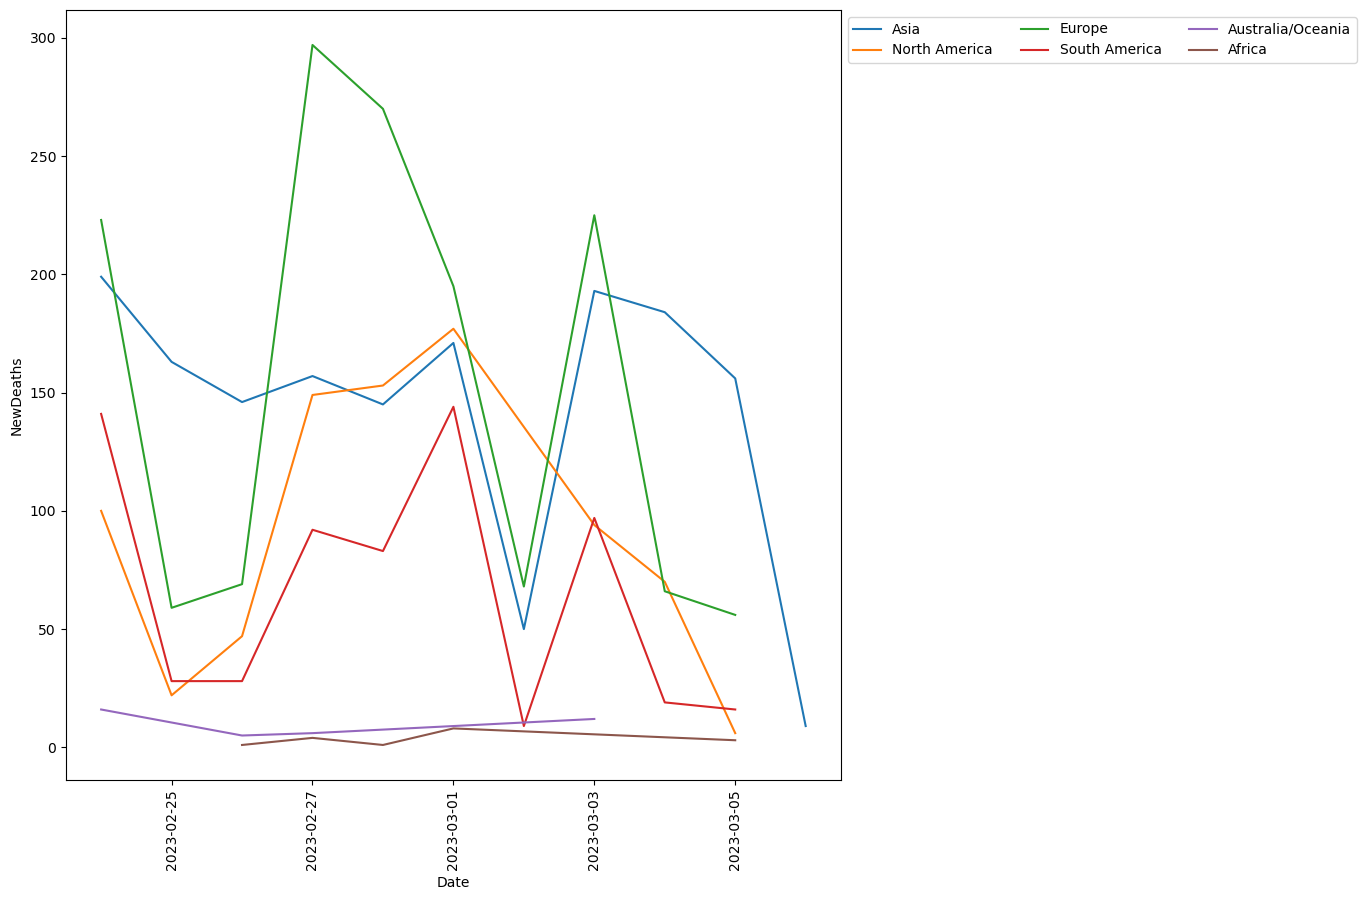

In [16]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="NewDeaths",
             hue="Continent", data=continents_df)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

(array([19413., 19415., 19417., 19419., 19421.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

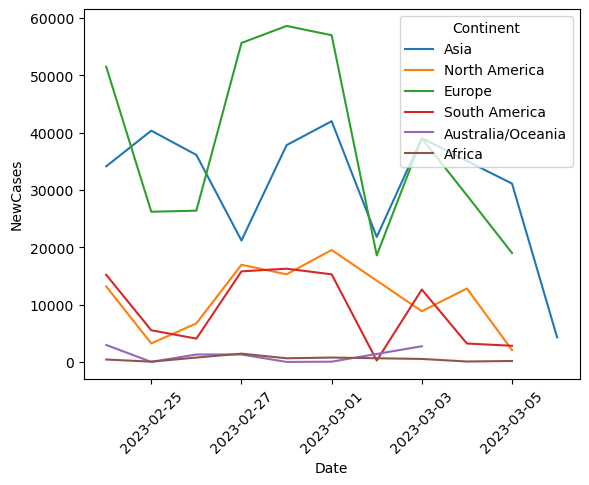

In [17]:
sns.lineplot(x="Date", y="NewCases",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

(array([19413., 19415., 19417., 19419., 19421.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

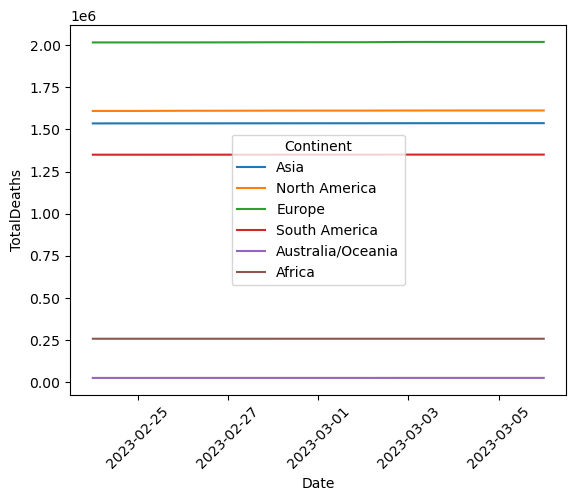

In [18]:
sns.lineplot(x="Date", y="TotalDeaths",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

In [19]:
!conda install geopandas
import geopandas as gpd

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



# All requested packages already installed.



In [20]:
tmp_df =countries_df.groupby(['Date','Continent']).Population.sum().reset_index()
tmp_df

,Date,Continent,Population
0,2023-02-24,Africa,1.406729e+09
1,2023-02-24,Asia,4.711357e+09
2,2023-02-24,Australia/Oceania,4.347041e+07
3,2023-02-24,Europe,7.475438e+08
4,2023-02-24,North America,5.981409e+08
...,...,...,...
61,2023-03-06,Asia,4.711357e+09
62,2023-03-06,Australia/Oceania,4.347041e+07
63,2023-03-06,Europe,7.475438e+08
64,2023-03-06,North America,5.981409e+08


<AxesSubplot:xlabel='Continent', ylabel='Population'>

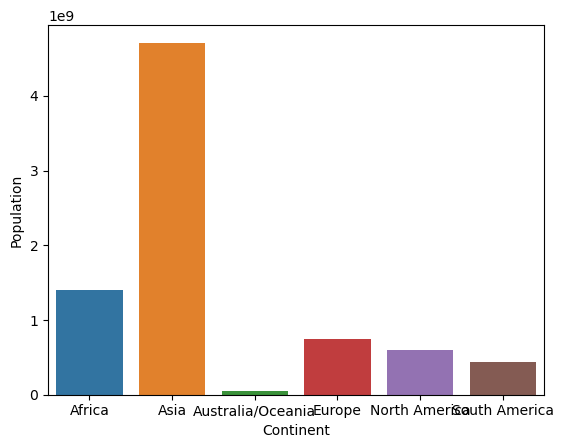

In [21]:
sns.barplot(data=tmp_df, x="Continent", y="Population")

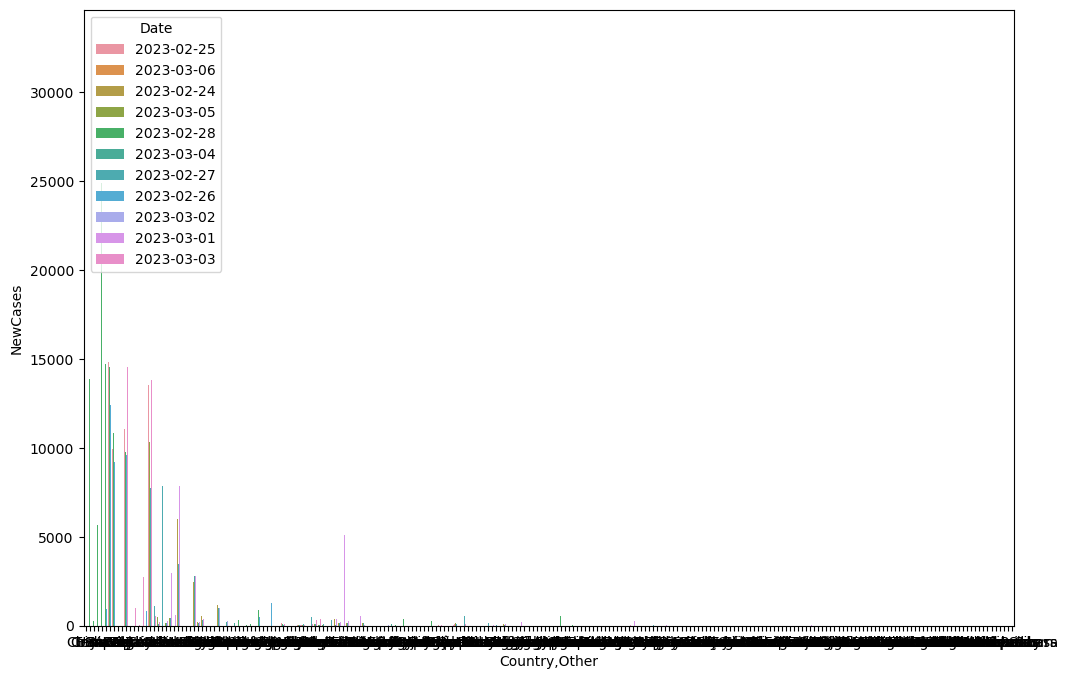

In [22]:
f = plt.figure(figsize=(12, 8))
fig = sns.barplot(data=countries_df, x = 'Country,Other', y = 'NewCases',hue='Date')

In [23]:
countries_df[countries_df['NewCases'] > 582]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
9,2.0,USA,105172692,2747.0,1144461.0,20.0,102605010.0,37149.0,1423221.0,2588.0,...,3476874.0,334805269.0,North America,3.0,293.0,0.0,NaN,0.06,4251.0,2023-02-25
11,4.0,France,39612797,3843.0,164877.0,NaN,39377523.0,2603.0,70397.0,869.0,...,4139547.0,65584518.0,Europe,2.0,398.0,0.0,NaN,NaN,1073.0,2023-02-25
13,6.0,Brazil,37023465,2934.0,698933.0,5.0,36185975.0,NaN,138557.0,NaN,...,296146.0,215353593.0,South America,6.0,308.0,3.0,NaN,0.02,643.0,2023-02-25
14,7.0,Japan,33172567,14846.0,72206.0,72.0,21680804.0,5174.0,11419557.0,173.0,...,756004.0,125584838.0,Asia,4.0,1739.0,1.0,NaN,0.60,90931.0,2023-02-25
15,8.0,S. Korea,30489666,9913.0,33940.0,11.0,30245452.0,16100.0,210274.0,181.0,...,307892.0,51329899.0,Asia,2.0,1512.0,3.0,NaN,0.20,4097.0,2023-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,24.0,Austria,5931599,5275.0,21919.0,3.0,5850048.0,3692.0,59632.0,81.0,...,23302116.0,9066710.0,Europe,2.0,414.0,0.0,582.0,0.30,6577.0,2023-03-03
2505,28.0,Chile,5174951,2861.0,64210.0,13.0,5101501.0,NaN,9240.0,87.0,...,2518757.0,19250195.0,South America,4.0,300.0,0.0,149.0,0.70,480.0,2023-03-03
2511,34.0,Czechia,4612902,906.0,42460.0,7.0,4560259.0,1804.0,10183.0,47.0,...,5310093.0,10736784.0,Europe,2.0,253.0,0.0,84.0,0.70,948.0,2023-03-03
2521,44.0,Serbia,2495185,804.0,17844.0,5.0,2462649.0,812.0,14692.0,10.0,...,1435653.0,8653016.0,Europe,3.0,485.0,1.0,93.0,0.60,1698.0,2023-03-03


In [24]:
import datetime

# What do elements cause newcases in these countries?

What do elements contribute to total deaths in some countries?

In [25]:
df = countries_df[countries_df['Date']==datetime.date.today()]

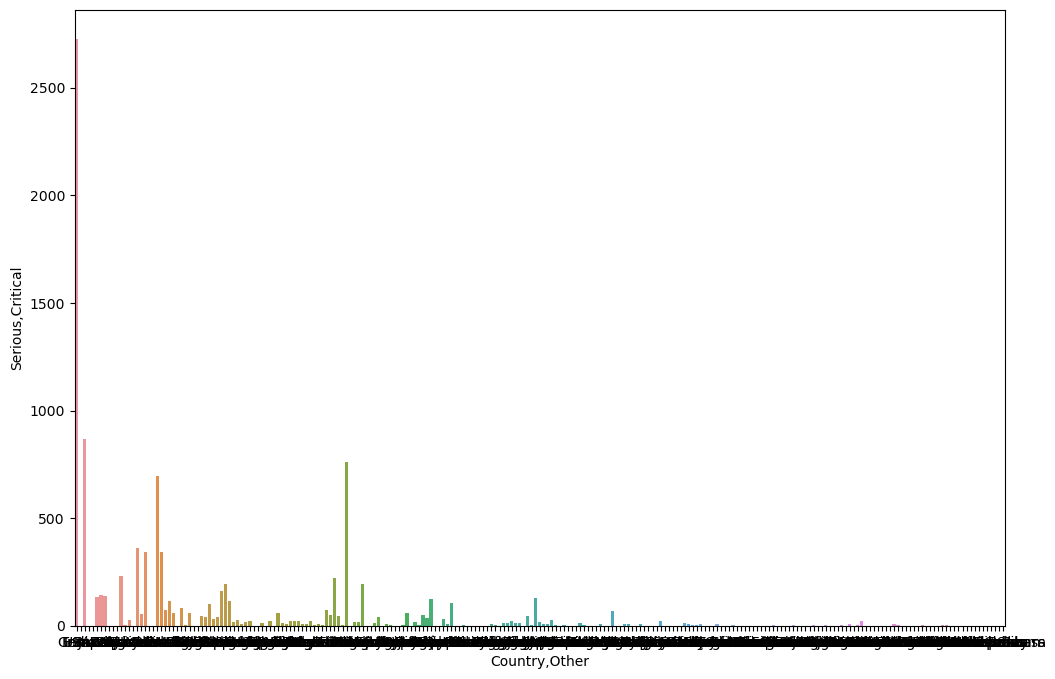

In [26]:
f = plt.figure(figsize=(12, 8))
fig = sns.barplot(data=df, x = 'Country,Other', y = 'Serious,Critical')

In [27]:
countries_df[countries_df['Serious,Critical'] > 3000]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-25
502,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-24
749,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-03-05
996,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-28
1243,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-03-04
1490,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-27
1737,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-26
2231,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-03-01
2478,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-03-03
